# Credit Card Default Analysis and Prediction
From the angle of banks issuing credit cards, it's better to lend more money to more people given the people would not default. Having a clear view of the default distribution map over the whole population can be a powerful tool for banks and companies to achieve more revenue.<br>
For the scale of this project, we are going to investigate in customers' default payments in Taiwan and develop a model that can predict whether a customer would default on her/his credict card. Even though the dataset is Taiwan specific, it might still be appliable to other parts of the world.

Dataset: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


## Objective
We are going to build a model to predict whether a customer would default in the upcoming months.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
path = "/content/drive/MyDrive/afterschool_projects/Credit_Card_Default/UCI_Credit_Card.csv"
df = pd.read_csv(path)

# Basic Dataset Understanding

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

According to the dataset source,<br>
*   X1 - LIMIT_BAL: Amount of the given credit (NT dollar), it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
*   X2 - SEX: Gender (1 = male; 2 = female).<br>
*   X3 - EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
*   X4 - MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).<br>
*   X5 - AGE: Age (year).<br>
*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
*   X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. <br>
*   X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.<br>




We have customers' credit card transaction history over the past 6 months and we are going to use them to predict if the customer will default or not.<br>
Note that since we are only using the data period of 6 months, the result model is likely to be universal and be easily implemented into banks' credit card service systems.

In [6]:
df.isnull().sum().sum()

0

We have no missing values in our dataset.

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

# Exploratory Data Analysis

In [9]:
df = df.rename(columns={'default.payment.next.month': 'default'})      # Rename this column for convenience

## Categorical Features

### Target Column: default & non-default ratio

<Axes: xlabel='default', ylabel='count'>

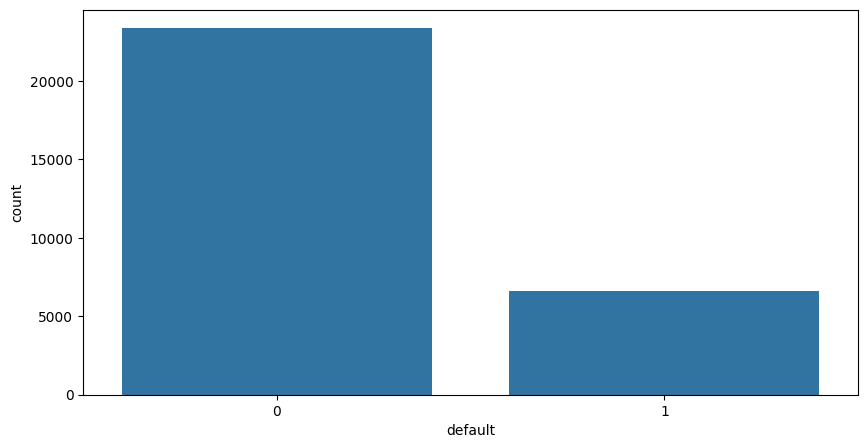

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default', data = df)

In [11]:
df[df['default']==0].size / df[df['default']==1].size

3.5207956600361663

We have about 3.5 times more non-default data than default data. Our dataset is imbalanced and we need to keep that in mind. We will deal with that later.

### Other Categorical Features: SEX, EDUCATION, and MARRIAGE

In [12]:
df['SEX'].value_counts(normalize=True)

,proportion
SEX,
2,0.603733
1,0.396267


In [13]:
df['EDUCATION'].value_counts(normalize=True)

,proportion
EDUCATION,
2,0.467667
1,0.352833
3,0.163900
5,0.009333
4,0.004100
6,0.001700
0,0.000467


According to the dataset description, 1 = graduate school; 2 = university; 3 = high school; 4 = others. Here, we have values like 0, 5, and 6 which are not defined. They share a small portion of the whole dataset, it might be a good idea to add them to type 4 others.

In [14]:
replace_values = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[replace_values, 'EDUCATION'] = 4

In [15]:
df['EDUCATION'].value_counts(normalize=True)

,proportion
EDUCATION,
2,0.467667
1,0.352833
3,0.163900
4,0.015600


In [16]:
df['MARRIAGE'].value_counts(normalize=True)

,proportion
MARRIAGE,
2,0.532133
1,0.455300
3,0.010767
0,0.001800


We do the same thing for marriage value of 0.

In [17]:
replace_values = df['MARRIAGE'] == 0
df.loc[replace_values, 'MARRIAGE'] = 3

In [18]:
df['MARRIAGE'].value_counts(normalize=True)

,proportion
MARRIAGE,
2,0.532133
1,0.455300
3,0.012567


## Plot Categorical Features

In [19]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['default'] = df['default']

<ipython-input-19-8fefa3e6254f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['default'] = df['default']


In [20]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<ipython-input-20-75c884ee1e42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 1000x500 with 0 Axes>

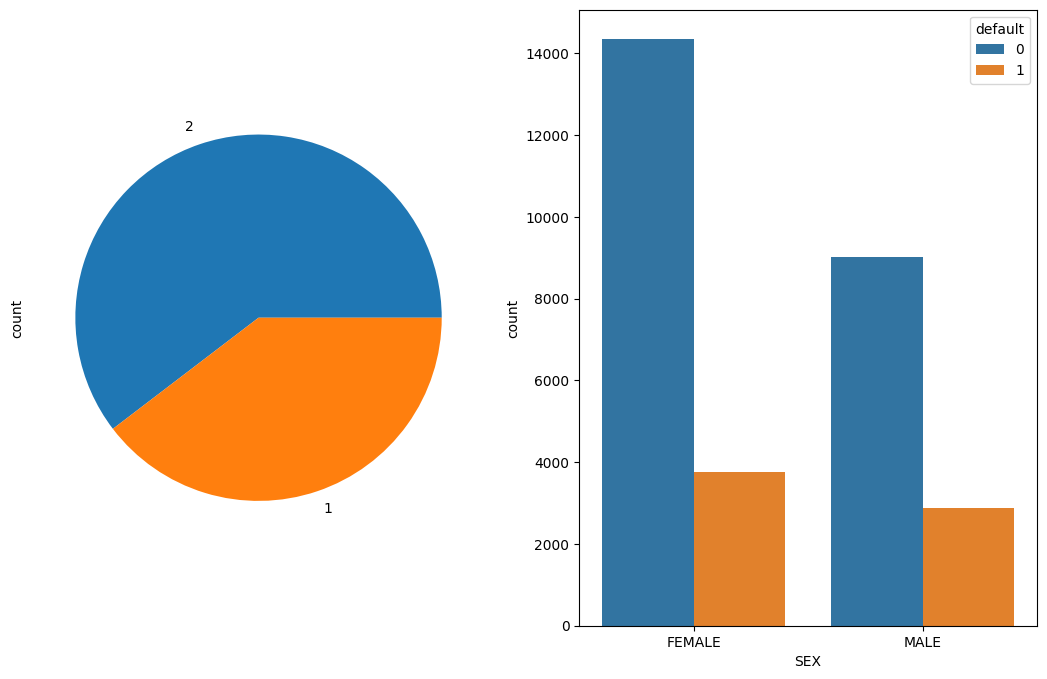

<Figure size 1000x500 with 0 Axes>

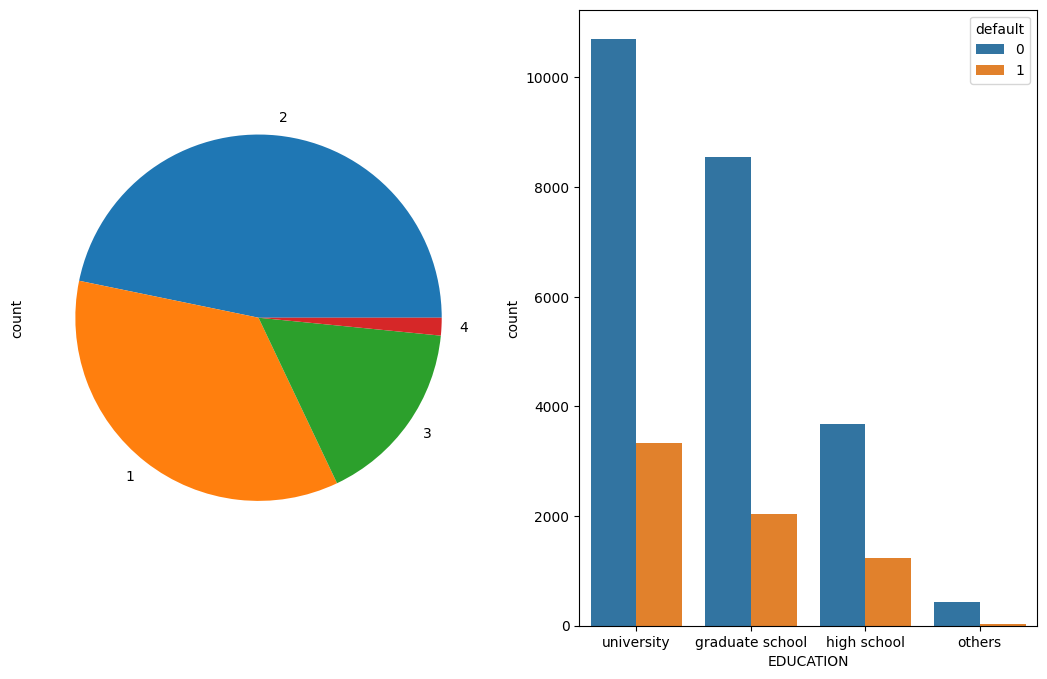

<Figure size 1000x500 with 0 Axes>

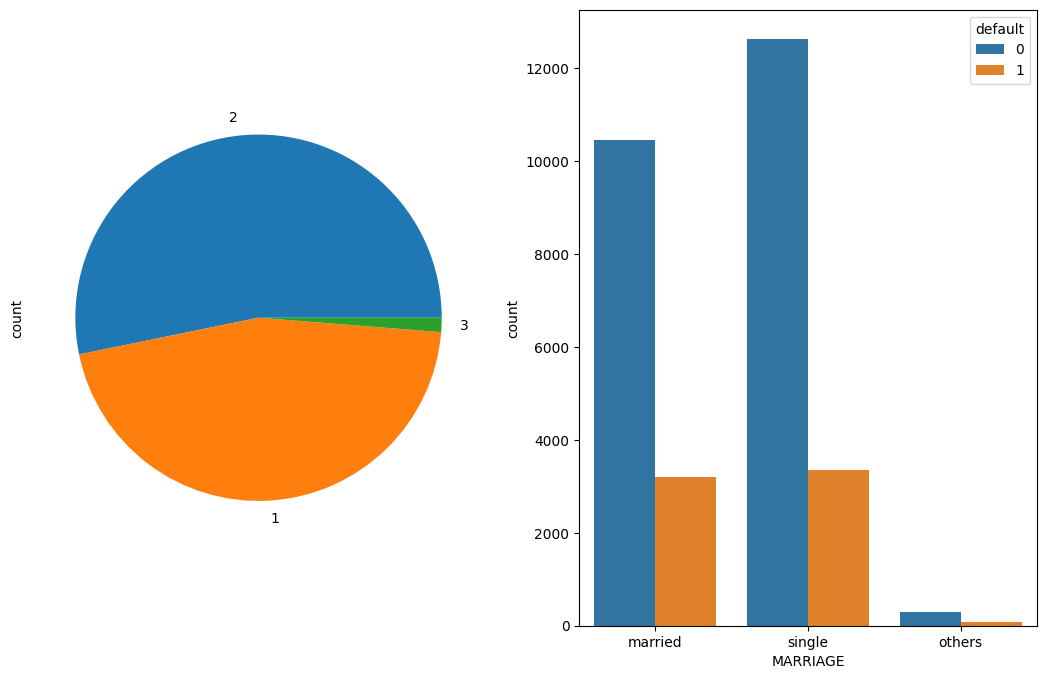

In [21]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'default', data = df_cat)

Some findings:


*   There are more female defaulters, but the percentage of defaulters among each sex is greater for male.
*   People with higher education default more but the non-default / default ratio is higher as well.
*   Single people default more than married people but the proportion of defaulters among each population is not.



## Continuous Features

### Credit Card Limits Check

In [22]:
df['LIMIT_BAL'].max(), df['LIMIT_BAL'].min()

(1000000.0, 10000.0)

In [23]:
df['LIMIT_BAL'].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


<Axes: xlabel='default', ylabel='LIMIT_BAL'>

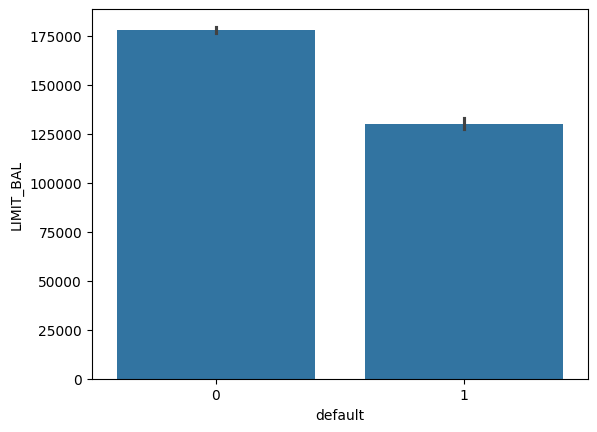

In [24]:
sns.barplot(x='default', y='LIMIT_BAL', data=df)

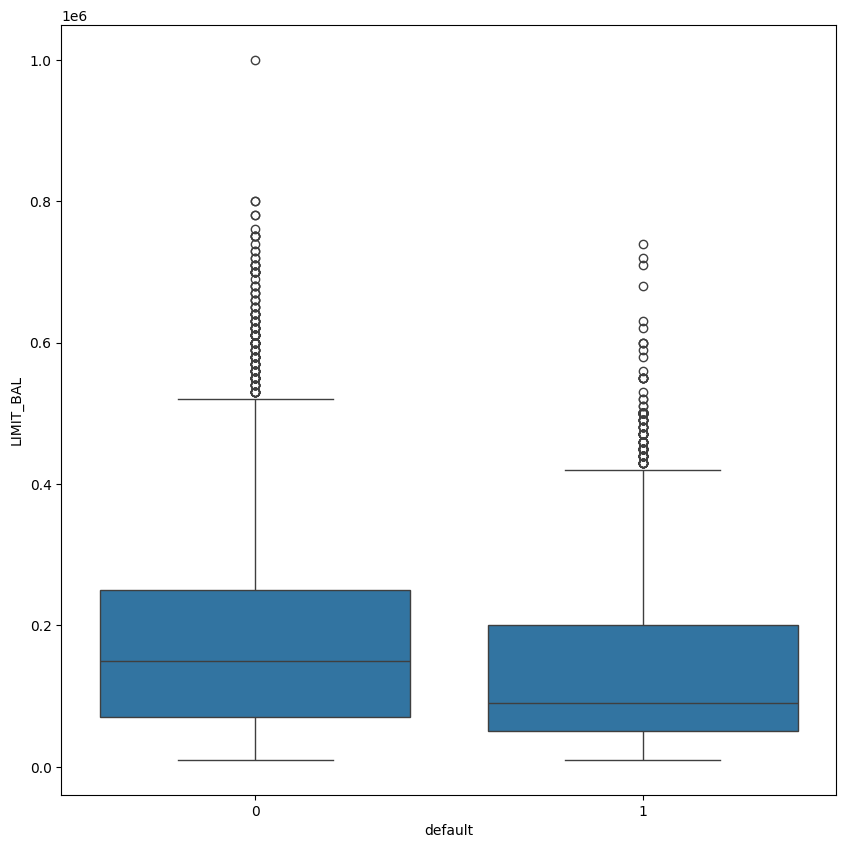

In [25]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='default', y='LIMIT_BAL', data=df)

### AGE

In [26]:
df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


<Axes: xlabel='AGE', ylabel='count'>

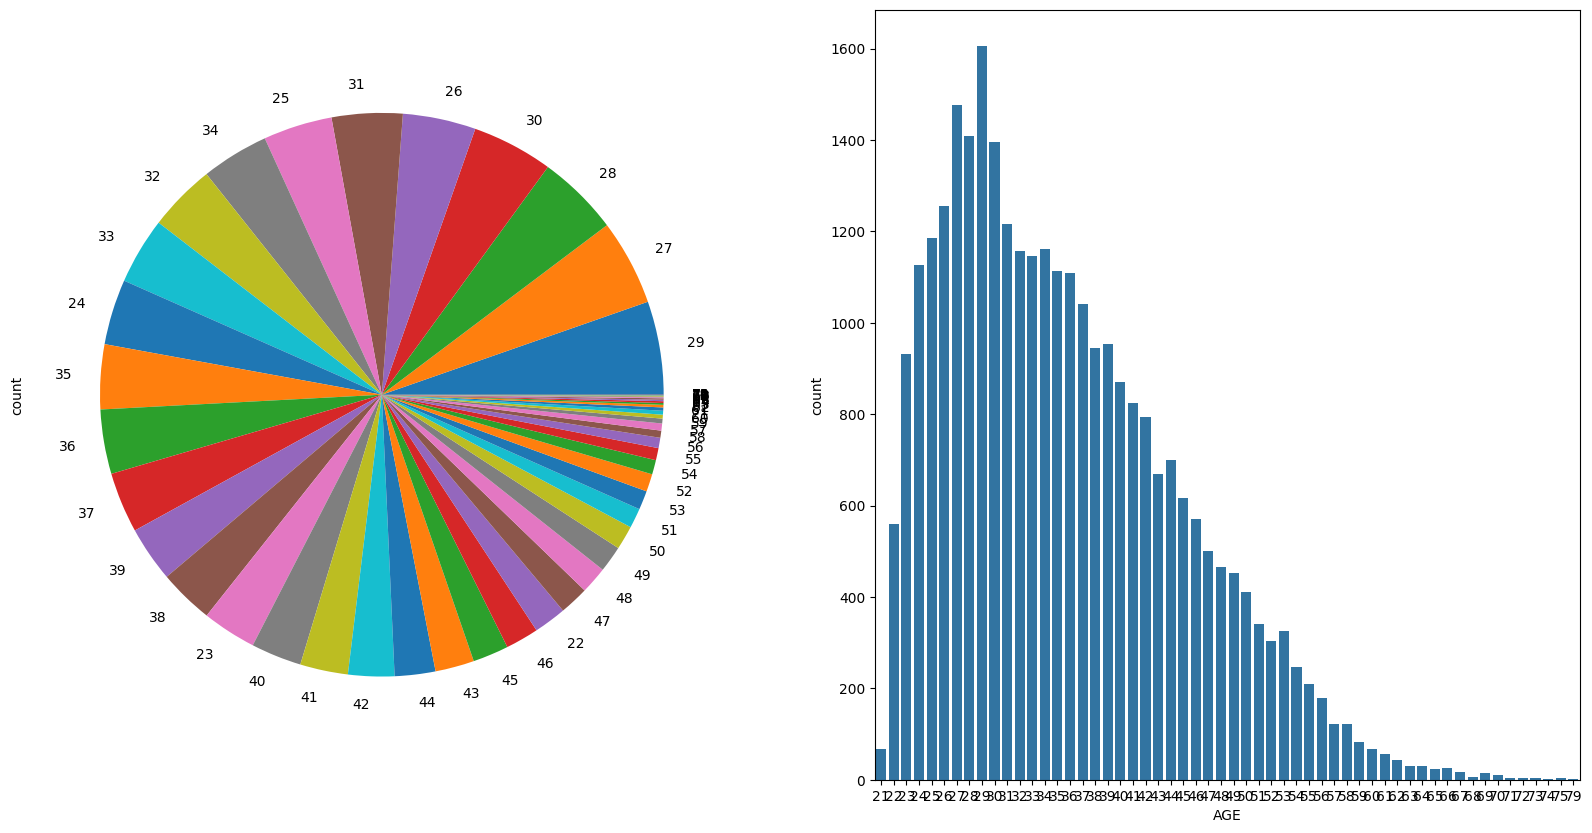

In [27]:
df['AGE']=df['AGE'].astype('int')
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
age_df = df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='AGE',y='count',data=age_df,ax = axes[1],orient='v')

In [28]:
df.groupby('default')['AGE'].mean()

,AGE
default,
0,35.417266
1,35.725738


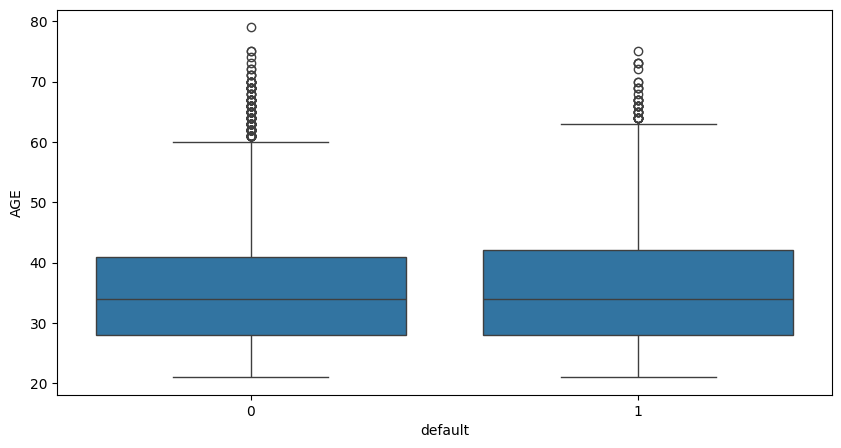

In [29]:
df = df.astype('int')
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='default', y='AGE', data=df)

In [30]:
# df.to_csv('credit_card_default.csv')

In [34]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

### Bill Amount, Pays, and Pay Amount

In [35]:
bill_amt_df = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

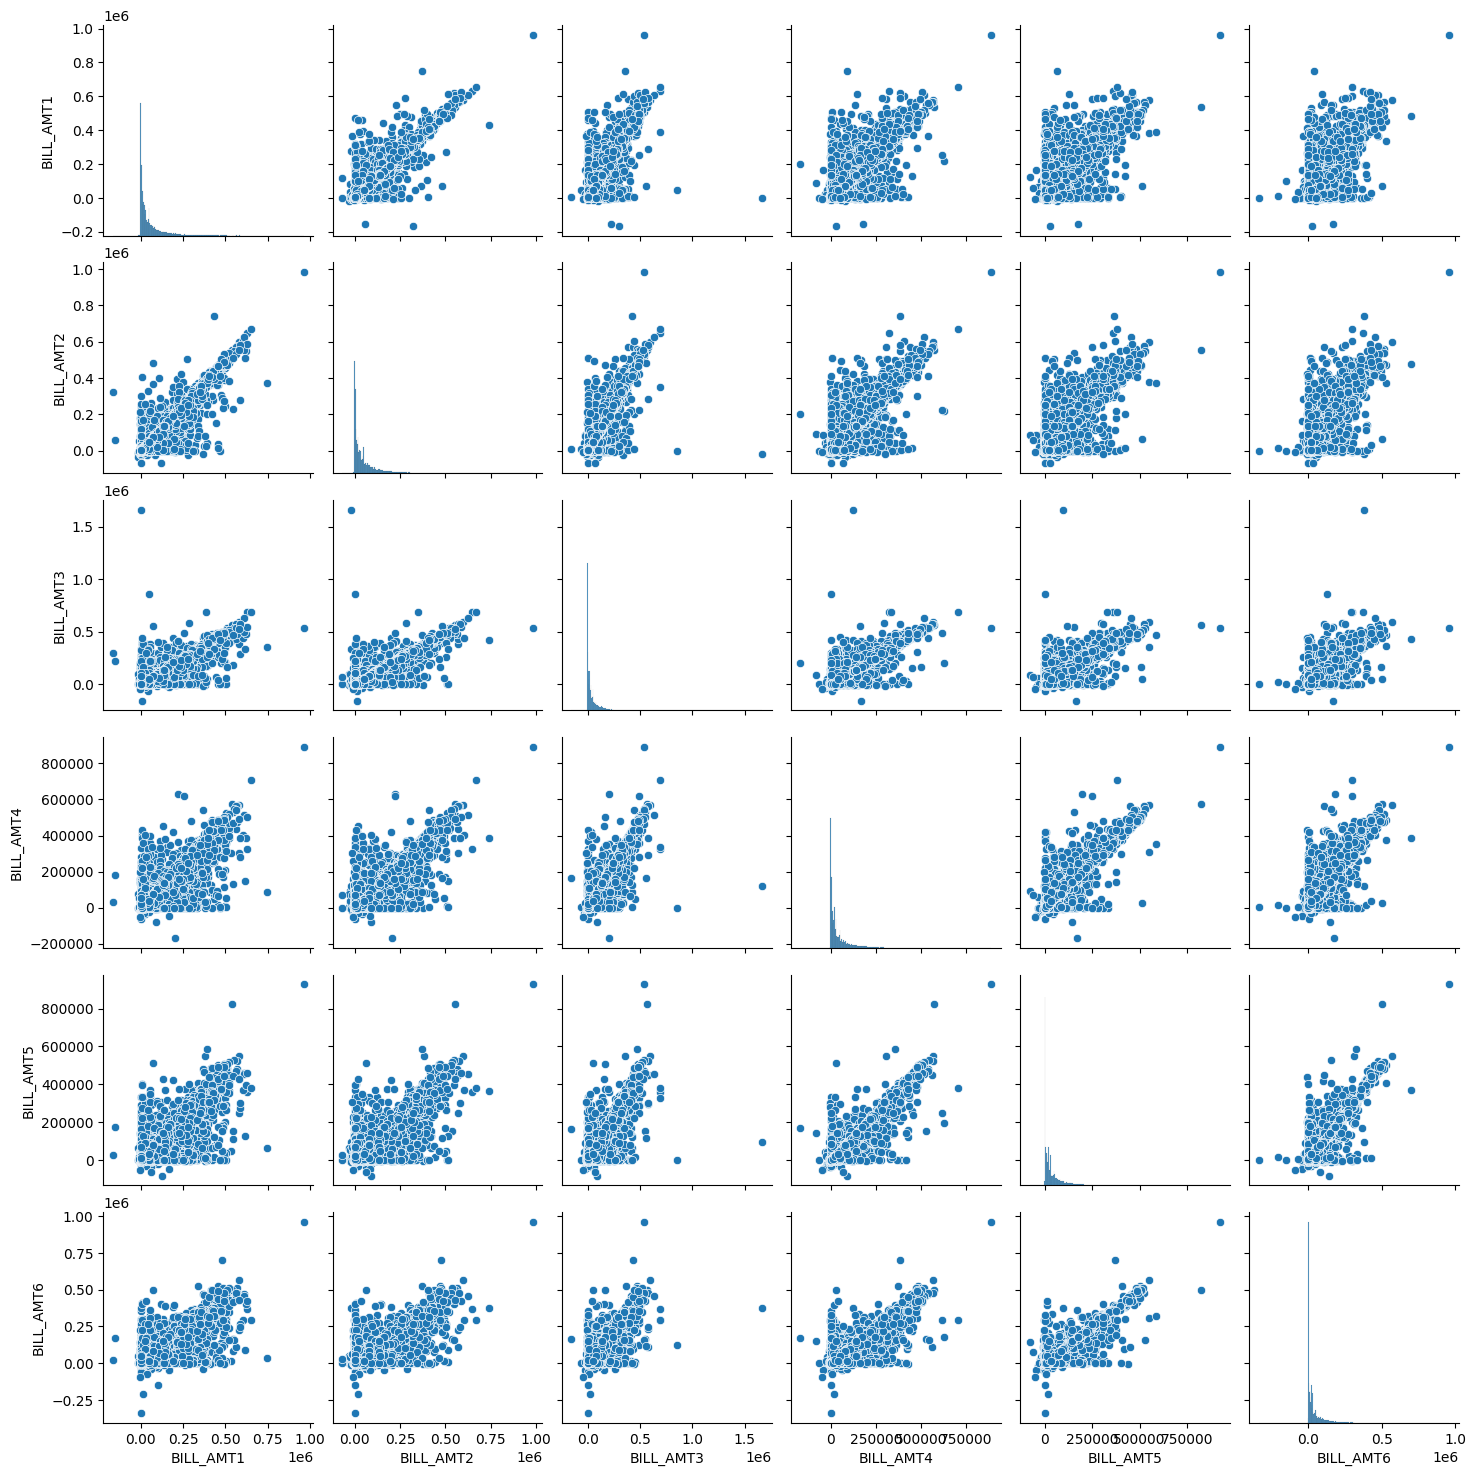

In [37]:
sns.pairplot(data = bill_amt_df)

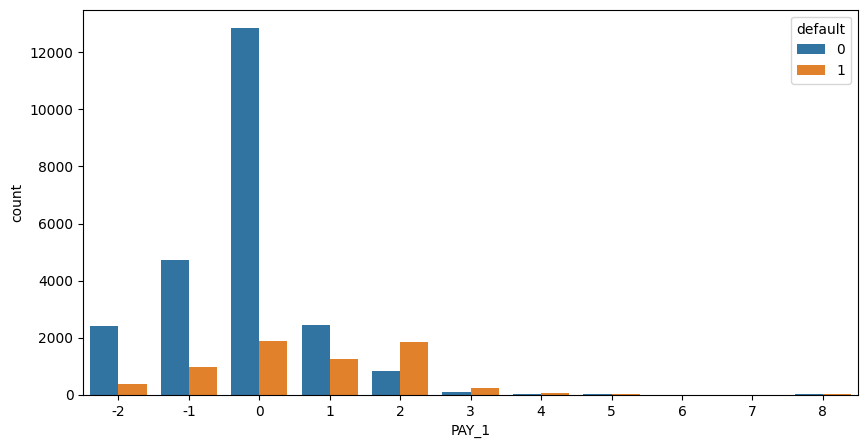

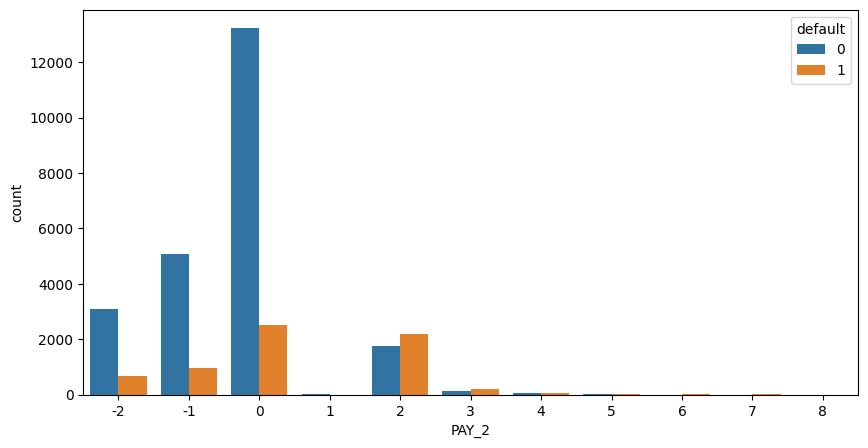

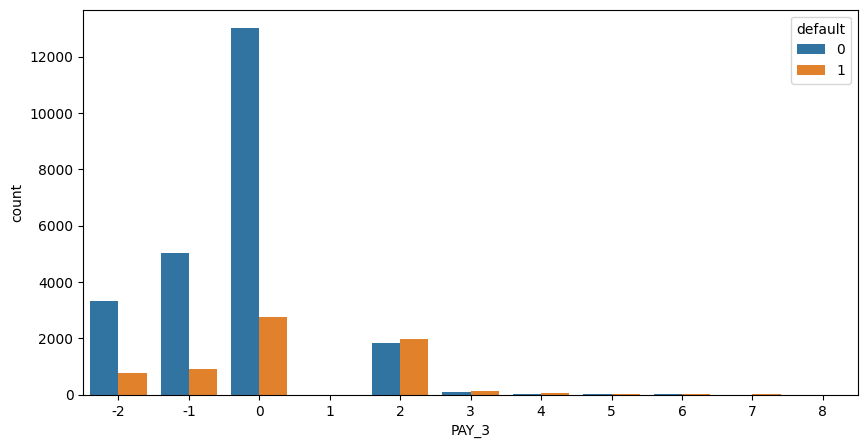

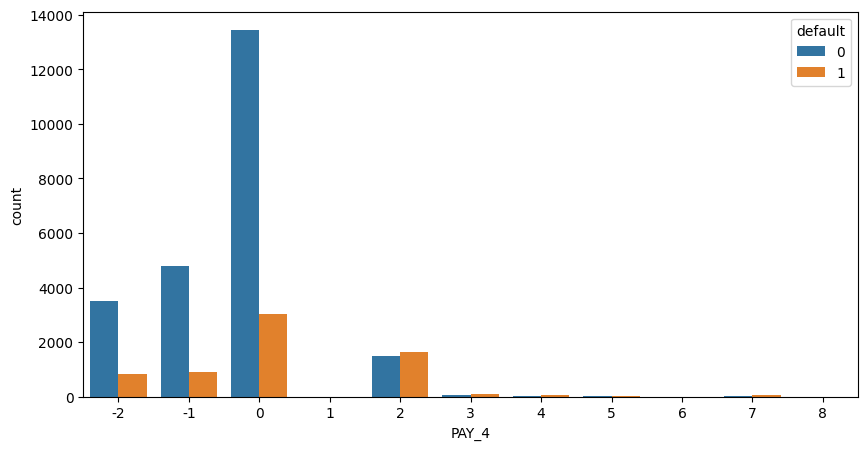

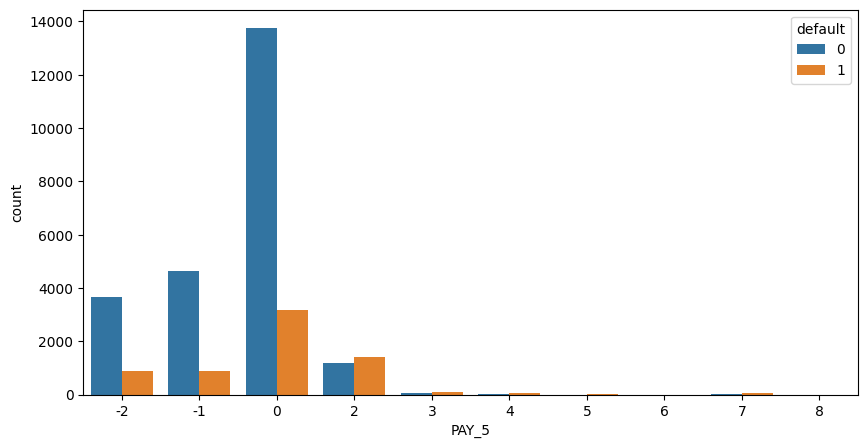

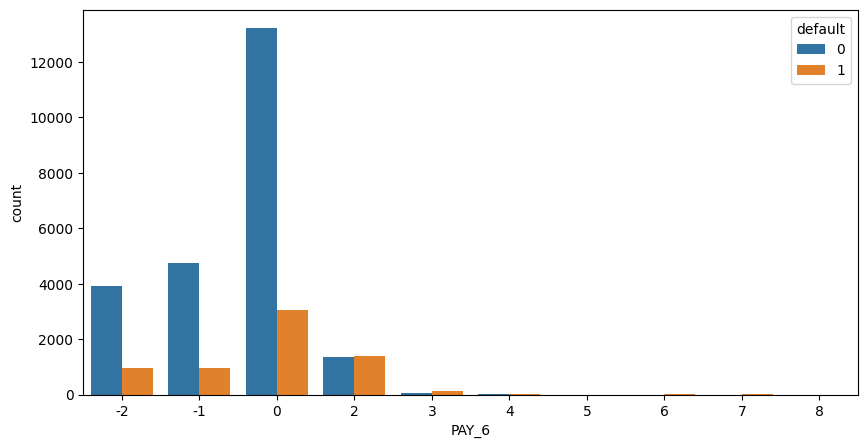

In [38]:
pay_col = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default', data = df)

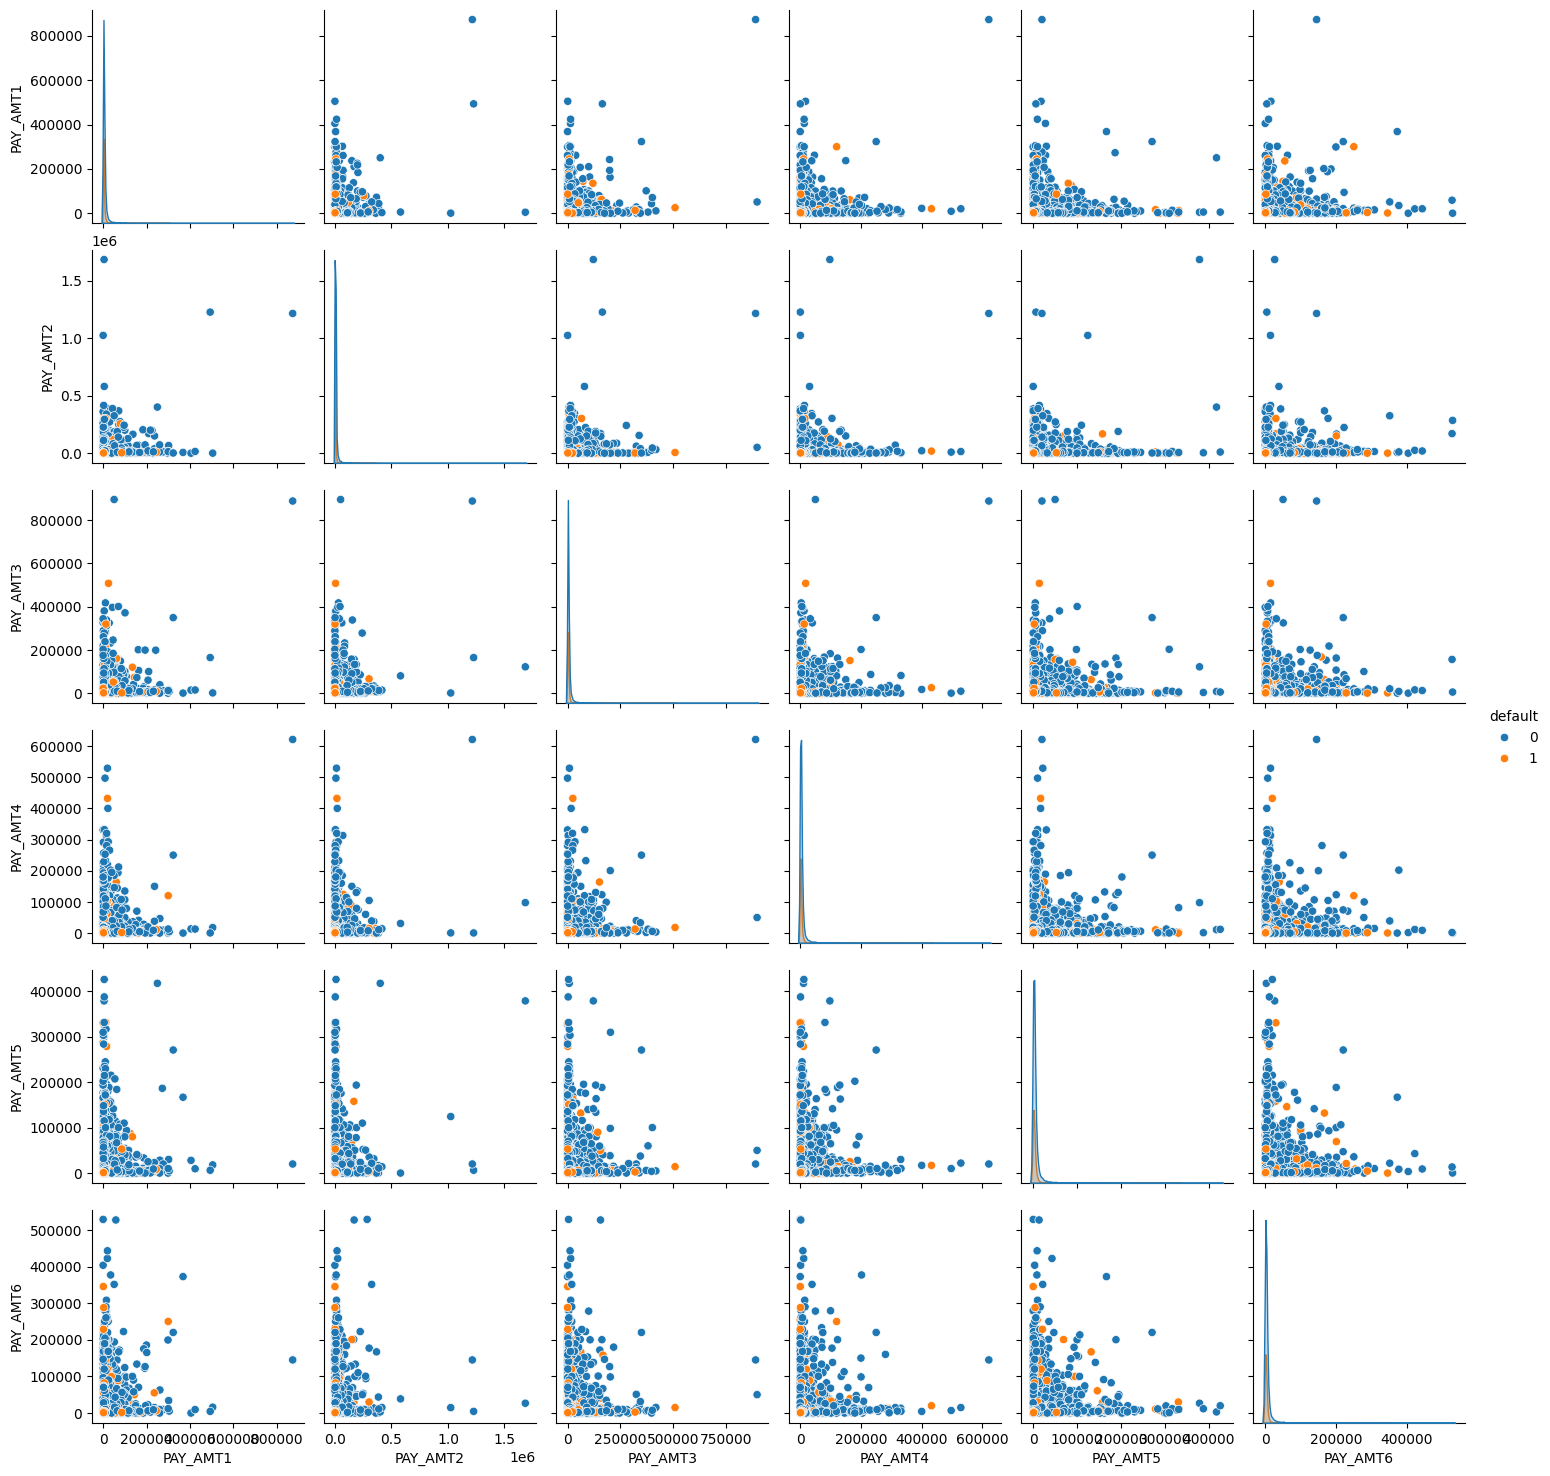

In [39]:
pay_amt_df = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']]
sns.pairplot(data = pay_amt_df, hue='default')

# Deal with Imbalanced Data
SMOTE (Synthetic Minority Oversampling Technique) is a common technique to handle imbalanced data. We are going to use SMOTE to fix the problem of imbalanced dafault and non-default data here.


In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default'])

# Check dataset shape
len(df), len(y_smote)

(30000, 46728)

In [44]:
x_smote.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [45]:
y_smote.head()

,default
0,1
1,1
2,0
3,0
4,0


In [46]:
balanced_df = x_smote
balanced_df['default'] = y_smote

In [47]:
balanced_df.shape

(46728, 25)

In [51]:
balanced_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: xlabel='default', ylabel='count'>

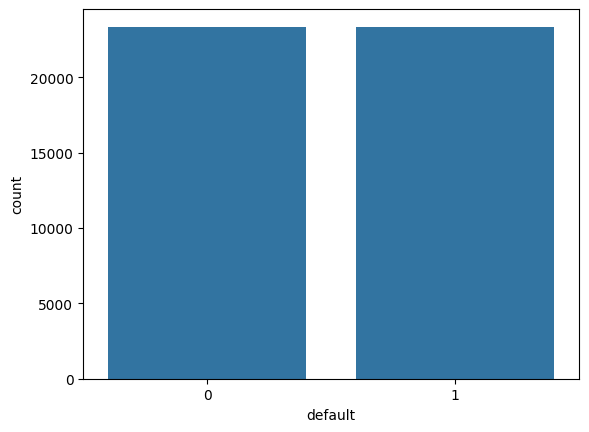

In [52]:
sns.countplot(balanced_df, x='default')

# Feature Engineering

In [69]:
dff = balanced_df.copy()

In [70]:
dff['pmt_value'] = dff['PAY_1'] + dff['PAY_2'] + dff['PAY_3'] + dff['PAY_4'] + dff['PAY_5'] + dff['PAY_6']

In [71]:
dff.groupby('default').agg(avg_pmt_value=('pmt_value', 'mean')).reset_index()

,default,avg_pmt_value
0,0,-1.980140
1,1,1.703903


<Axes: xlabel='default', ylabel='pmt_value'>

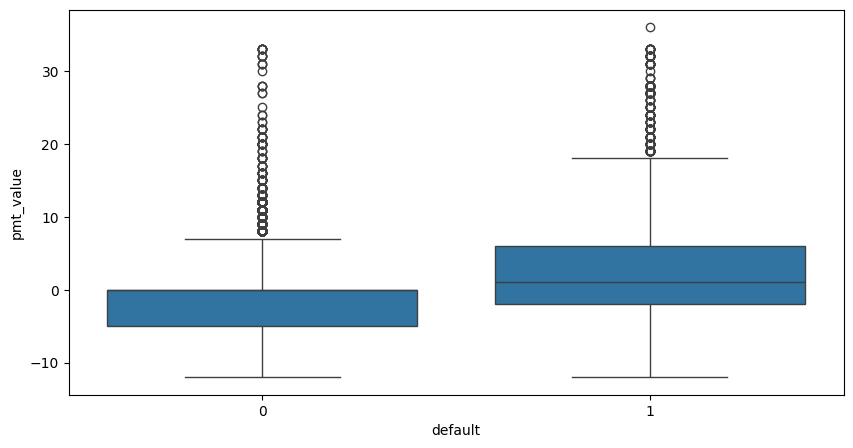

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(data = dff, x = 'default', y = 'pmt_value' )

In [73]:
dff['dues'] = (dff['BILL_AMT1'] + dff['BILL_AMT2'] + dff['BILL_AMT3'] + dff['BILL_AMT4'] + dff['BILL_AMT5'] + dff['BILL_AMT6']) - (dff['PAY_AMT1'] + dff['PAY_AMT2'] + dff['PAY_AMT3'] + dff['PAY_AMT4'] + dff['PAY_AMT5'] + dff['PAY_AMT6'])

In [74]:
dff.groupby('default').agg(avg_due=('dues', 'mean')).reset_index()

,default,avg_due
0,0,237459.487203
1,1,243236.752311


In [75]:
dff.replace({'SEX': {1 : 'male', 2 : 'female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [76]:
dff.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,pmt_value,dues
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7015
1,2,120000,female,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,12077
2,3,90000,female,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,90635
3,4,50000,female,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,222946
4,5,50000,male,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,50290


# One Hot Encoding for Categorical Columns

In [77]:
dff = pd.get_dummies(dff, columns=['EDUCATION','MARRIAGE'])

In [78]:
dff.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default,pmt_value,dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,female,24,2,2,-1,-1,-2,-2,...,1,-2,7015,False,False,False,True,True,False,False
1,2,120000,female,26,-1,2,0,0,0,2,...,1,3,12077,False,False,False,True,False,False,True
2,3,90000,female,34,0,0,0,0,0,0,...,0,0,90635,False,False,False,True,False,False,True
3,4,50000,female,37,0,0,0,0,0,0,...,0,0,222946,False,False,False,True,True,False,False
4,5,50000,male,57,-1,0,-1,0,0,0,...,0,-2,50290,False,False,False,True,True,False,False


In [79]:
dff = dff.drop(['EDUCATION_others','MARRIAGE_others'], axis = 1)

In [81]:
dff = pd.get_dummies(dff, columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first = True )

In [82]:
dff.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,female,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,female,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,female,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,female,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,male,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [83]:
dff = dff.replace({'SEX': {'female': 0, 'male': 1}})

In [84]:
dff.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [85]:
dff = dff.drop('ID', axis=1)

In [86]:
dff.to_csv('final_df.csv')

In [87]:
final_df = dff

# Model Training

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

## Logistic Regression

In [88]:
df_log = final_df.copy()

In [89]:
df_log.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [90]:
X = df_log.drop(['default','pmt_value','dues'], axis=1)
y = df_log['default']

In [91]:
columns = X.columns

In [92]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [94]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [95]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [96]:
optimized_clf = grid_lr_clf.best_estimator_

In [97]:
grid_lr_clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [98]:
grid_lr_clf.best_score_

0.7528988826350177

In [99]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [100]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [101]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7531542466541029
The accuracy on test data is  0.7524803838920952


In [102]:
test_accuracy_lr = accuracy_score(test_class_preds, y_test)
test_precision_score_lr = precision_score(test_class_preds, y_test)
test_recall_score_lr = recall_score(test_class_preds, y_test)
test_f1_score_lr = f1_score(test_class_preds, y_test)
test_roc_score_lr = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7524803838920952
The precision on test data is  0.6872892347600519
The recall on test data is  0.7903057419835944
The f1 on test data is  0.7352063822407214
The roc_score on test data is  0.7568440137178183


[[12819  2834]
 [ 4894 10760]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

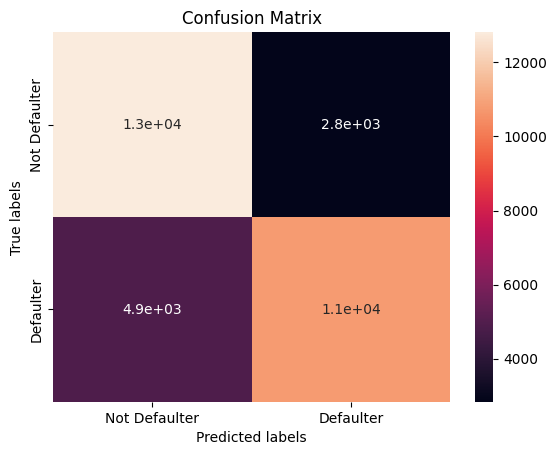

In [103]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [104]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

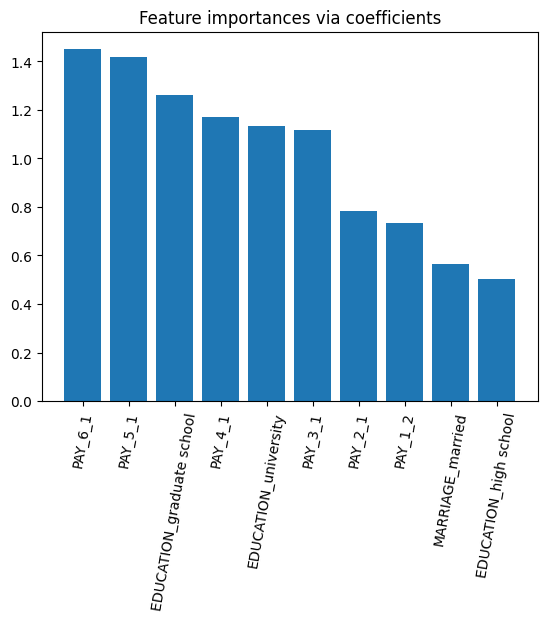

In [105]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [106]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

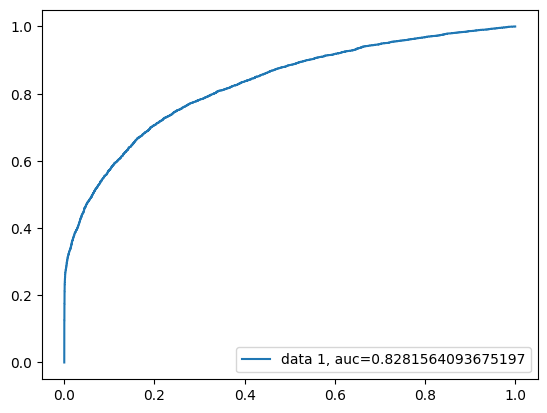

In [107]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Classifier (SVC)

In [108]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}

In [110]:
X = final_df.drop(['default','pmt_value','dues'],axis=1)
y = final_df['default']

In [111]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [113]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [114]:
optimal_SVC_clf = grid_clf.best_estimator_
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [115]:
grid_clf.best_score_

0.7760565613030074

In [117]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [118]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7531542466541029
The accuracy on test data is  0.7524803838920952


In [119]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7775111860450036
The precision on test data is  0.7101167315175098
The recall on test data is  0.8207165342527357
The f1 on test data is  0.7614213197969544
The roc_score on test data is  0.7826439814120822


[[13716  1937]
 [ 4067 11587]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

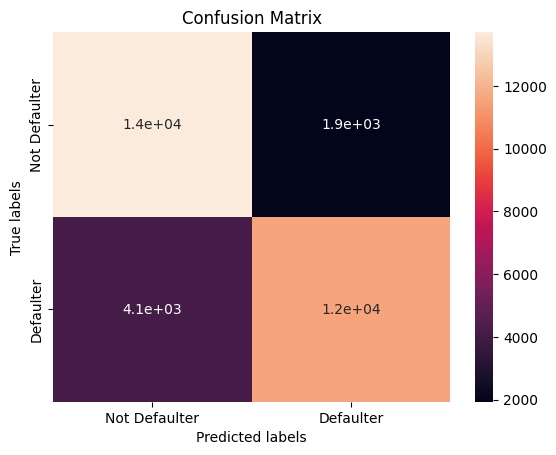

In [120]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [121]:
import torch

In [122]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_SVC_clf, path)

In [123]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_SVC_clf = torch.load(path)

In [124]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [125]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [126]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

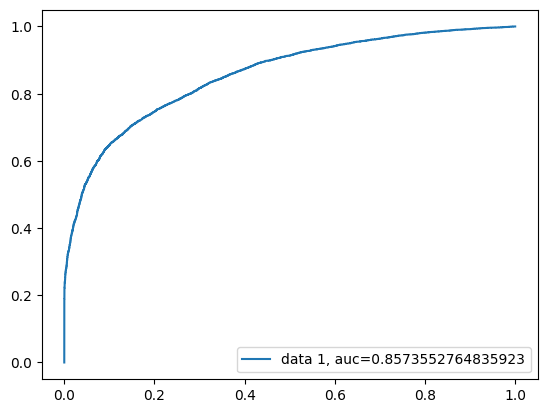

In [127]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree

In [128]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [129]:
X = final_df.drop(['default','pmt_value','dues'],axis=1)
y = final_df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [132]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [133]:
grid_DTC_clf.best_score_

0.7052098479156562

In [134]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [135]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [136]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [137]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7064873670425145
The accuracy on test data is  0.7007327670060307


## Random Forest

In [139]:
X = final_df.drop(['default','pmt_value','dues'],axis=1)
y = final_df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [140]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [141]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [142]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994250487111509
The accuracy on test data is  0.8360676998897607


In [143]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8360676998897607
The precision on test data is  0.8050583657587549
The recall on test data is  0.8582688053097345
The f1 on test data is  0.8308124749029582
The roc_score on test data is  0.8373649558359638


In [144]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [145]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [146]:
grid_rf_clf.best_score_

0.8184432592963713

In [147]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [148]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [149]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [150]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.998626505254416
The accuracy on test data is  0.8356137734258479


In [151]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8356137734258479
The precision on test data is  0.8042801556420234
The recall on test data is  0.8580323785803238
The f1 on test data is  0.8302872062663185
The roc_score on test data is  0.8369366188727833


In [152]:
len(optimal_rf_clf.feature_importances_)

80

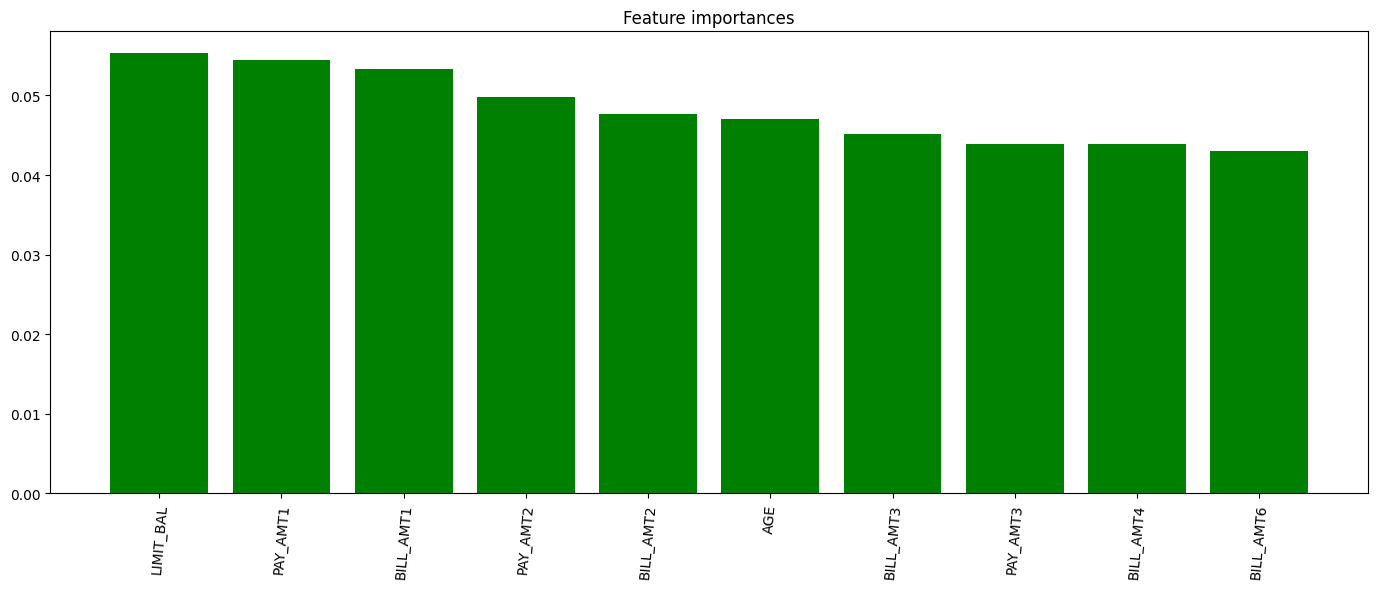

In [153]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [154]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_rf_clf, path)

In [155]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_rf_clf = torch.load(path)

In [156]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [157]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [158]:
import sklearn.metrics as metrics

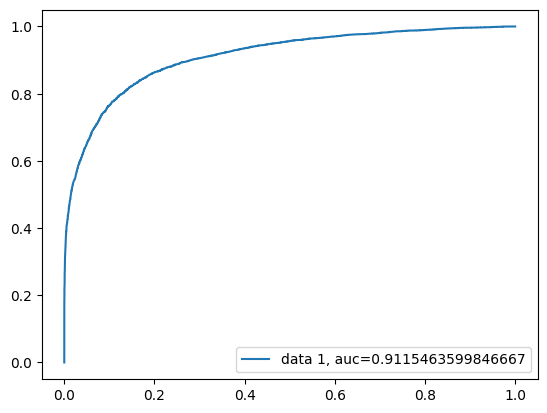

In [159]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## XGBoost

In [160]:
import lightgbm as lgb
import xgboost as xgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [161]:
X = final_df.drop(['default','pmt_value','dues'],axis=1)
y = final_df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [162]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [163]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [164]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [165]:
#Execution time of the model
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=1, microseconds=244481)

In [166]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [167]:
len(train_class_preds_probs)

31307

In [168]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [169]:
test_class_preds_probs[:20]

array([0.28007188, 0.24533534, 0.41376767, 0.24022982, 0.2285044 ,
       0.28873622, 0.17992267, 0.38546267, 0.6202835 , 0.29837927,
       0.46723327, 0.32105243, 0.3401857 , 0.47116655, 0.79952365,
       0.28061882, 0.772404  , 0.4576016 , 0.86784303, 0.23668198],
      dtype=float32)

In [170]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]

In [171]:
len(y_train)

31307

In [172]:
len(train_class_preds)

31307

In [173]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7853515188296547
The accuracy on test data is  0.772647688217366


In [174]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.772647688217366
The precision on test data is  0.698313878080415
The recall on test data is  0.8202315661182206
The f1 on test data is  0.7543785904441641
The roc_score on train data is  0.7788072135660539


### Tune XGBoost

In [175]:
from xgboost import  XGBClassifier

In [176]:
X = final_df.drop(['default','pmt_value','dues'],axis=1)
y = final_df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [177]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [178]:
gsearch1.best_score_

0.8209984830684197

In [179]:
optimal_xgb = gsearch1.best_estimator_

In [180]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [181]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9158335196601399
The accuracy on test data is  0.8314635886129305


In [182]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8314635886129305
The precision on test data is  0.7936446173800259
The recall on test data is  0.858566016556756
The f1 on test data is  0.8248298173485205
The roc_score on train data is  0.8333703002967046


In [183]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_3_1,0.156493
PAY_2_1,0.154068
PAY_1_2,0.071969
PAY_4_1,0.057306
PAY_2_2,0.045525
PAY_6_1,0.042247
PAY_5_1,0.041609
PAY_1_1,0.034618
SEX,0.030340
MARRIAGE_married,0.025251


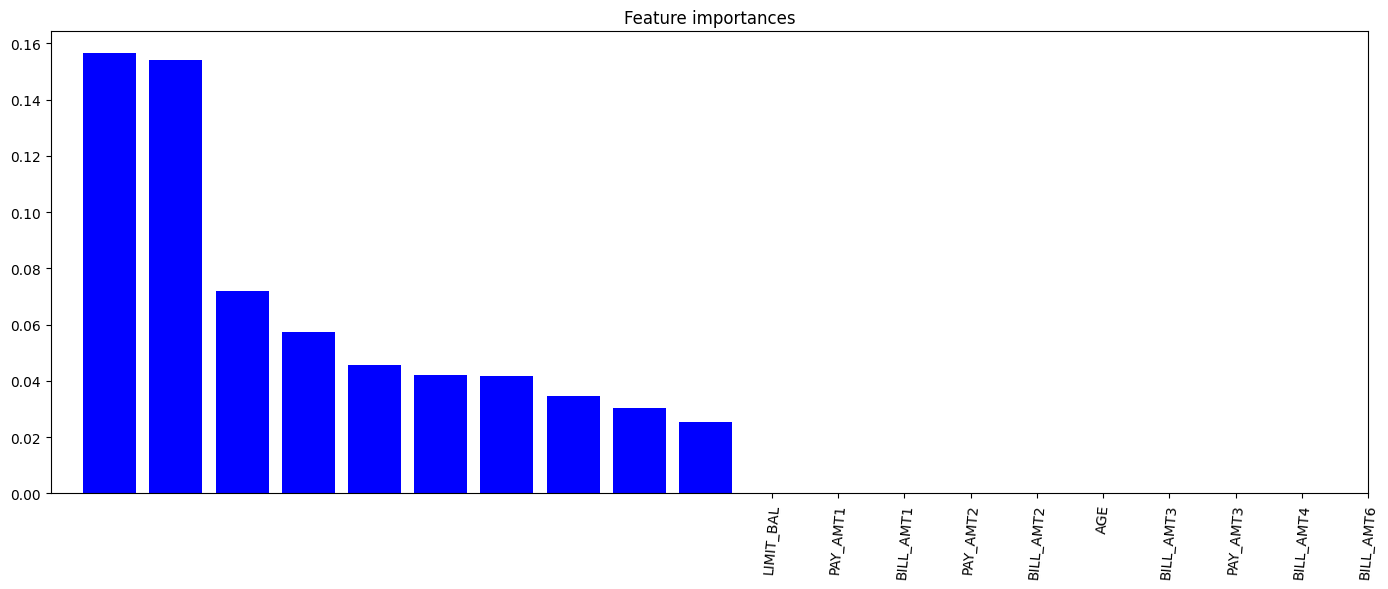

In [184]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [185]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

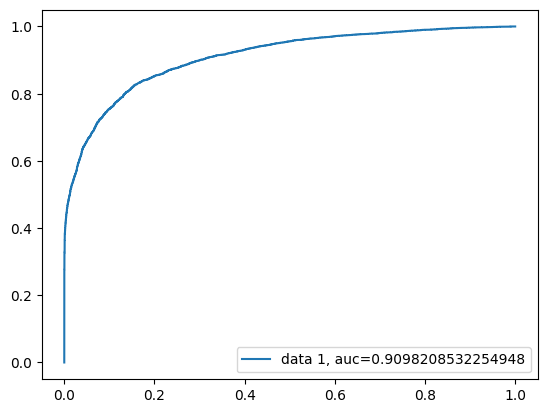

In [186]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [187]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_xgb, path)

In [188]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_xgb = torch.load(path)

# Evaluate Models

In [189]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [190]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [191]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.753154,0.752480,0.687289,0.790306,0.735206
1,SVC,0.808222,0.777511,0.710117,0.820717,0.761421
2,Random Forest CLf,0.998627,0.835614,0.804280,0.858032,0.830287
3,Xgboost Clf,0.915834,0.831464,0.793645,0.858566,0.824830


In [196]:
from sklearn.metrics import roc_curve, roc_auc_score

In [201]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr),
                     (optimal_rf_clf, y_preds_proba_rf),
                     (optimal_xgb, y_preds_proba_xgb),
                     (optimal_SVC_clf, y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for pair in classifiers_proba:
    fpr, tpr, _ = roc_curve(y_test, pair[1])
    auc = roc_auc_score(y_test, pair[1])

    # Use pd.concat to append to the DataFrame
    row = pd.DataFrame({'classifiers': [pair[0].__class__.__name__],
                        'fpr': [fpr],
                        'tpr': [tpr],
                        'auc': [auc]})

    result_table = pd.concat([result_table, row], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Display the result_table using standard print or display function
# print(result_table)
result_table = pd.DataFrame(result_table)
result_table

<ipython-input-201-7ab99a520f2d>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat([result_table, row], ignore_index=True)


,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00038910505836...",0.828156
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03942931258106355, 0.03968871595330739...",0.911546
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00038910505836...",0.909821
SVC,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.15123216601815...",0.857355


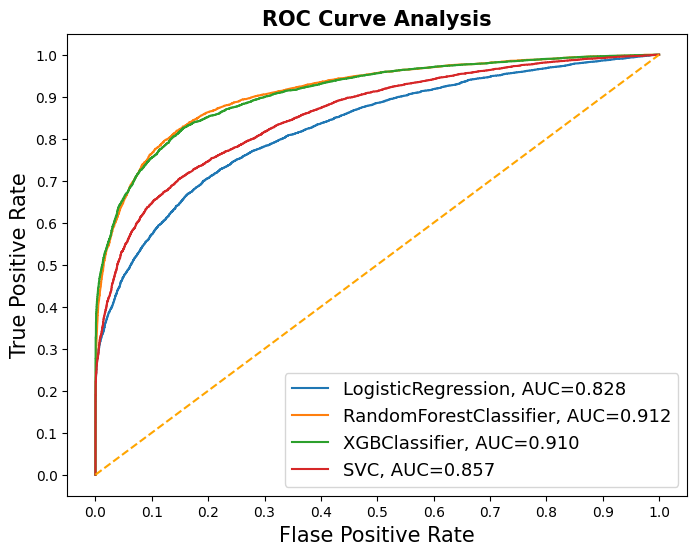

In [202]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conclusion
From the ROC curve, we can conclude that Random Forest Classifier and XGBoost Classifier works comparably the best among all the models we trained. It might be a good idea to implement one or both of them into our bank's credit card service systems to help identify customers who are likely to have a credit card default in the upcoming month using some data like past 6 months transaction history.